<a href="https://colab.research.google.com/github/peagle1105/BIP_project/blob/QunuBoyfriend/datatraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain tumor classification**
### 1. Data preprocessing:
* Load the file
* Resize all image
* Remove the files having wrong shape
* Seperate train and test files
* Plot bar chart



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mục mới

#**Data preprocessing**

In [ ]:
#import library
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
import joblib
from skimage.io import imread
from skimage.transform import resize

def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary,
    together with labels and metadata. The dictionary is written to a pickle file
    named '{pklname}_{width}x{height}px.pkl'.

    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """

    height = height if height is not None else width

    data = dict()
    data['description'] = 'resized ({0}x{1})brain_MRI images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []

    pklname = f"{pklname}_{width}x{height}px.pkl"

    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)

            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)

        joblib.dump(data, pklname)

In [ ]:
def thresholding(img):
    """
    increase the contrast of an image
    """
    # Check the data type and number of channels of the input image
    if img.dtype != np.uint8 or img.ndim != 2:
        # Convert the input image to a single-channel 8-bit unsigned integer image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.astype(np.uint8)

    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    return thresh

In [ ]:
# modify to fit your system
from google.colab import drive
drive.mount('/content/drive')
data_path = fr'/content/drive/MyDrive/BrainTumorModelTraining/BrainTumorDataset/Training'
os.listdir(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
base_name = 'brain_MRI'
width = 80

include = {'glioma', 'meningioma', 'notumor', 'pituitary'}

resize_all(src=data_path, pklname=base_name, width=width, include=include)


glioma
meningioma
notumor
pituitary


In [ ]:
from collections import Counter

data = joblib.load(f'{base_name}_{width}x{width}px.pkl')

print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))

Counter(data['label'])

number of samples:  5713
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)brain_MRI images in rgb
image shape:  (80, 80)
labels: ['gl' 'mening' 'not' 'pitui']


Counter({'gl': 1321, 'mening': 1340, 'not': 1595, 'pitui': 1457})

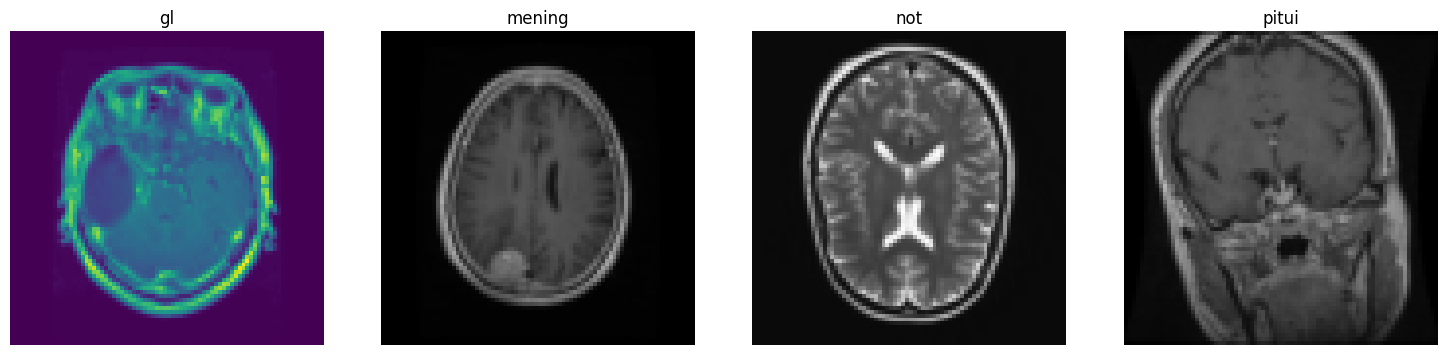

In [ ]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])

# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# make a plot for every label (equipment) type. The index method returns the
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)

    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

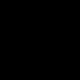

In [ ]:
labels = np.unique(data['label'])
X = []
Y = []
# Check for shape consistency
for i, img in enumerate(data['data']):
    if img.shape != (80, 80):
        continue
    else:
      if img.dtype == np.float64:
        # Convert the image to a supported data type
        img = img.astype(np.float32)
      # Convert grayscale image to BGR
      image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
      thresh = thresholding(image)
      X.append(thresh)
      Y.append(data['label'][i])
from google.colab.patches import cv2_imshow
cv2_imshow(X[0])
X = np.array(X)
y = np.array(Y)

In [ ]:
!git add .

!git commit -m “BIP”

!git push origin QunuBoy

hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> BIP_project
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached BIP_project
hint: 
hint: See "git help submodule" for more information.
error: open("drive/MyDrive/1. Trọng Phẩm.gdoc"): Operation not supported
error: unable to index file 'drive/MyDrive/1. Trọng Phẩm.gdoc'
fatal: adding files failed
On branch QunuBoy

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	BIP_project/
	brain_MRI_80x80px.pkl
	drive/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)
error: src refspec QunuBoy does not match any
error: failed to push 

In [ ]:
!git checkout -b QunuBoy

Switched to a new branch 'QunuBoy'


In [ ]:
!git status

On branch QunuBoyfriend

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	BIP_project/
	brain_MRI_80x80px.pkl
	drive/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git remote add origin https://github.com/peagle1105/BIP_project
!git checkout -b "QunuBoyfriend"

Switched to a new branch 'QunuBoyfriend'


In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=100,
)

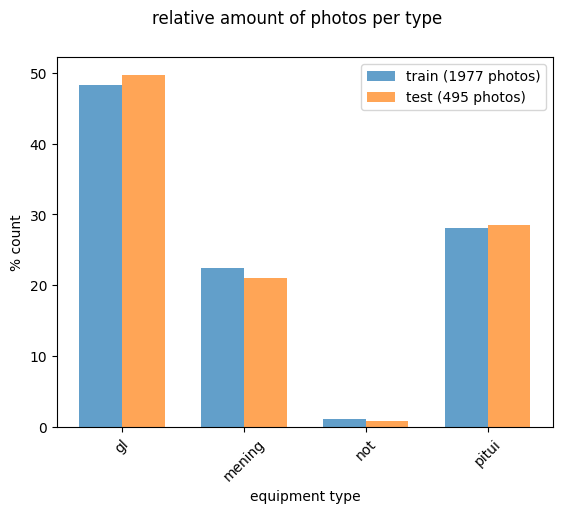

In [ ]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5

    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'

    xtemp = np.arange(len(unique))

    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)

plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)),
    'test ({0} photos)'.format(len(y_test))
]);


#**Processing**

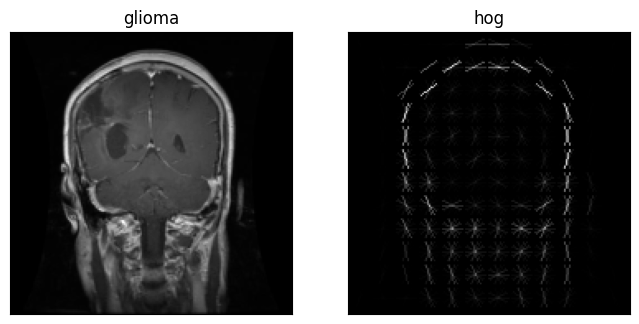

In [ ]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

glioma = imread('/content/drive/MyDrive/BrainTumorModelTraining/BrainTumorDataset/Training/glioma/Tr-gl_0010.jpg', as_gray=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg

# scale down the image to one third
glioma = rescale(glioma, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
glioma_hog, glioma_hog_img = hog(
    glioma, pixels_per_cell=(14,14),
    cells_per_block=(2, 2),
    orientations=9,
    visualize=True,
    block_norm='L2-Hys')

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax]

ax[0].imshow(glioma, cmap='gray')
ax[0].set_title('glioma')
ax[1].imshow(glioma_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [ ]:
print('number of pixels: ', glioma.shape[0] * glioma.shape[1])
print('number of hog features: ', glioma_hog.shape[0])


number of pixels:  29241
number of hog features:  4356


#**Transformer**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import skimage

class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """returns itself"""
        return self

    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])


class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """

    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)

        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage

# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14),
    cells_per_block=(2,2),
    orientations=9,
    block_norm='L2-Hys'
)
scalify = StandardScaler()

# call fit_transform on each transform converting X_train step by step
X_train_hog = hogify.fit_transform(X_train)
X_train_prepared = scalify.fit_transform(X_train_hog)

print(X_train_prepared.shape)

(1977, 576)


#**Training**

In [ ]:
sgd_clf = SGDClassifier(random_state=100, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=100)

#**Testing**

In [ ]:
X_test_hog = hogify.transform(X_test)
X_test_prepared = scalify.transform(X_test_hog)

In [ ]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False  True  True  True False  True  True  True  True False  True  True
 False False False  True  True  True False False False False  True  True
 False]

Percentage correct:  49.696969696969695
